# Lab Assignment 1

## Andrew Marquardt

Exercise 1: Diagnostic Code (I also included libraries here)

In [40]:
!pip install tclab --upgrade
from tclab import TCLab
import time
%matplotlib inline
from tclab import clock, setup, Historian, Plotter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Requirement already up-to-date: tclab in c:\users\andrew marquardt\anaconda3\lib\site-packages (0.4.9)


Exercise 2

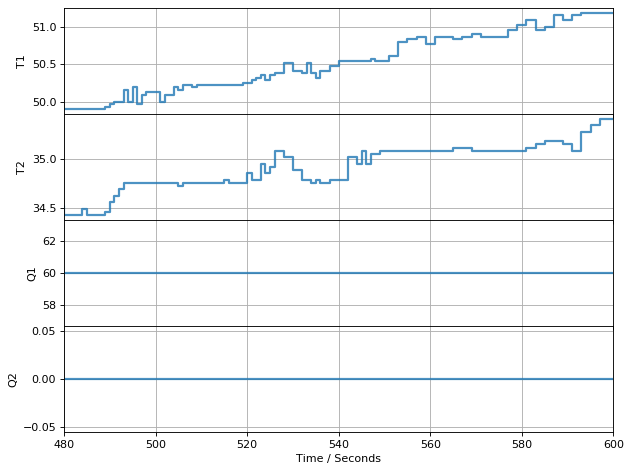

TCLab disconnected successfully.


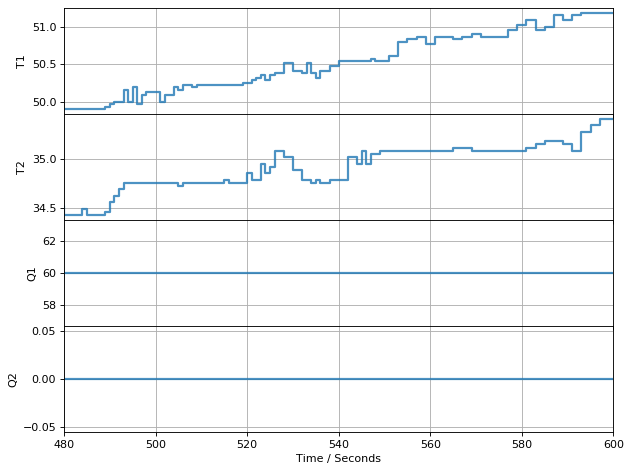

In [12]:
with TCLab() as tcl:
    h = Historian(tcl.sources)
    p = Plotter(h)
    for t in clock(600):    
        tcl.U1 = 60
        p.update(t)

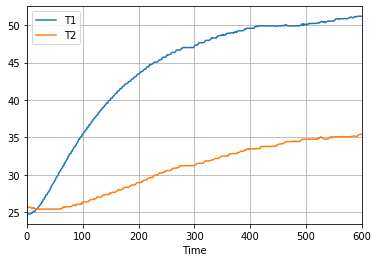

In [69]:
h.to_csv('data_e2.csv')
data = pd.read_csv('data_e2.csv')
data.index = data['Time']
data[['T1','T2']].plot(grid=True)

Exercise 3

In [73]:
# Increase: Tfinal - Tambient
# I took the ambient temp as the average of the initial temperatures of the 2 heaters
Tamb = (24.766 + 25.732)/2 # degrees C
Tfinal = 51.191 # degrees C
sys_gain = (Tfinal - Tamb)/60
# I calculated these values by calculating the Temp value at which these time constants will occur,
# then consulting the .csv file and reading off the time at which heater T1 reached those temperatures.
# Time constant: 63.2% of increase has occured
T_tau = 0.632*sys_gain + Tamb
tau = 170.5 # seconds
# Half-life: 50.0% of increase has occured
T_hl = sys_gain*60/2 + Tamb
t_hl = 128 # seconds
print("Characteristic time constant: " + str(tau) + " seconds.")
print("Half life: " + str(t_hl) + " seconds.")
print("System gain: " + str(sys_gain) + " degrees C per percent heater increase.")

Characteristic time constant: 170.5 seconds.
Half life: 128 seconds.
System gain: 0.43236666666666673 degrees C per percent heater increase.


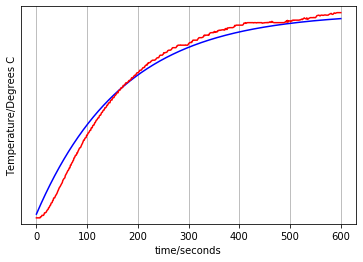

In [72]:
t_model = np.linspace(0,600,601)
T_model = sys_gain*60*(1 - np.exp(-t/tau)) + Tamb
t_data = data.index
T_data = data['T1'].values
fig,ax = plt.subplots(1,1)
ax.plot(t_model,T_model,'b')
ax.plot(t_data,T_data,'r','-')
ax.grid(True)
ax.set_xlabel("time/seconds")
ax.set_ylabel("Temperature/Degrees C")
ax.set_ylim(24,52)
plt.show()

The y-axis grid is not working on this plot for some reason; not sure how to debug this.

The curve fits somewhat well between 200 and 600 seconds, but it does not model data before that point well due to the observed inflection point early in the data set.  The model is somewhat accurate at steady state, though it consistently underpredicts the true temperature value.

Exercise 4

The T2 response does not appear to be second order.  The most clear evidence is that there is an inflection point in the T2 curve between 100 and 200 seconds.  However, the T2 curve does reach a temperature that appears to be steady state (the temperature is fairly constant for about 100 seconds), and therefore the gain can be the difference between the final temperature and the ambient temperature.  In this case, the gain for the T2 unit would be 0.1692 degrees C per percent heater increase.

Notebook link: https://github.com/avmarq/Controls-Assignments/blob/main/Lab%20Assignment%201.ipynb